<a href="https://colab.research.google.com/github/hrushikesh070902/OIBSIP/blob/main/IrisClassification_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1: IRIS FLOWER CLASSIFICATION**

**Hrushikesh Shetty**


The objective is to develop a predictive model that can effectively categorize new iris flowers into three species (setosa, versicolor, or virginica). By examining the dataset's patterns and relationships, diverse machine learning algorithms like logistic regression, decision trees, or random forest can be utilized. This model learns from the flower features to make precise predictions on unseen data, enabling the classification of new iris flowers based on their measurements.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Iris.csv")

# **Explore the Data**


In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [7]:
print("Maximum Sepal Length: ",data['SepalLengthCm'].max())
print("Minimum Sepal Length: ",data['SepalLengthCm'].min())

print("Maximum Sepal Width: ",data['SepalWidthCm'].max())
print("Minimum Sepal Width: ",data['SepalWidthCm'].min())

print("Maximum Petal Length: ",data['PetalLengthCm'].max())
print("Minimum Petal Length: ",data['PetalLengthCm'].min())

print("Maximum Petal Width: ",data['PetalWidthCm'].max())
print("Minimum Petal Width: ",data['PetalWidthCm'].min())

Maximum Sepal Length:  7.9
Minimum Sepal Length:  4.3
Maximum Sepal Width:  4.4
Minimum Sepal Width:  2.0
Maximum Petal Length:  6.9
Minimum Petal Length:  1.0
Maximum Petal Width:  2.5
Minimum Petal Width:  0.1


In [8]:
spec = data.groupby("Species")

In [9]:
spec.count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


# **Data Visualization**

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

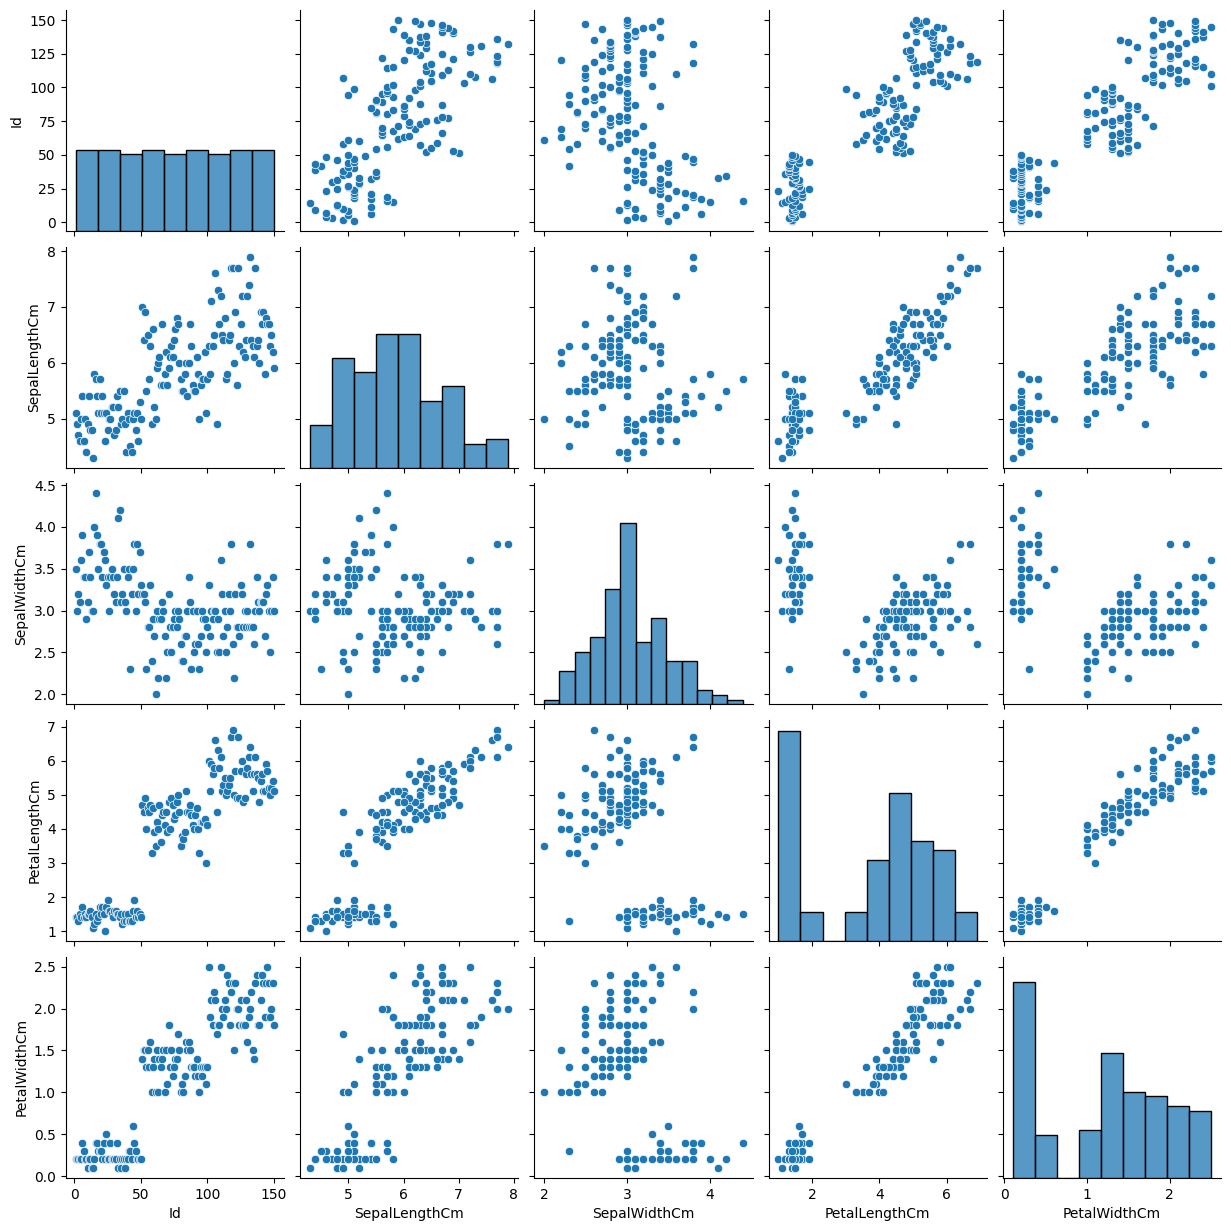

In [11]:
sb.pairplot(data)

# **Barplot**

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

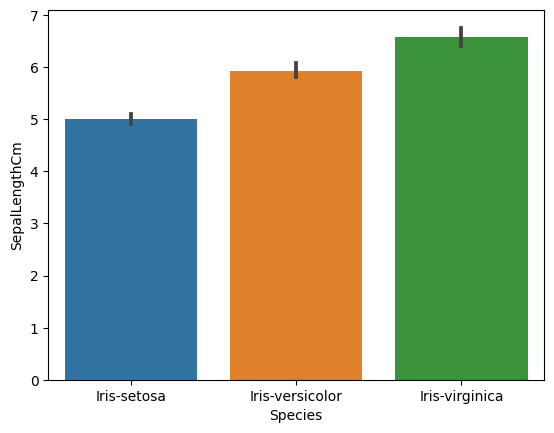

In [12]:
#mean
sb.barplot(x='Species' , y='SepalLengthCm' , data=data)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

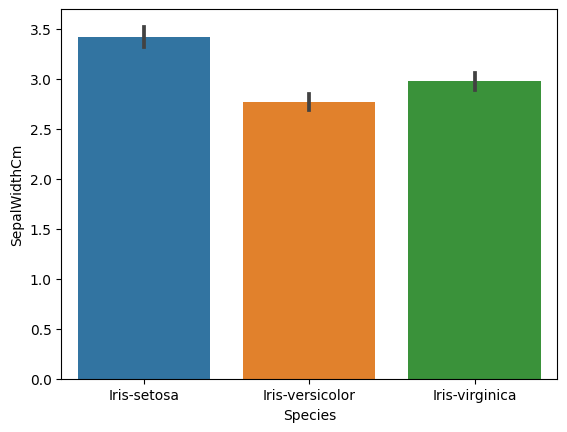

In [13]:
sb.barplot(x='Species' , y='SepalWidthCm'  , data=data)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

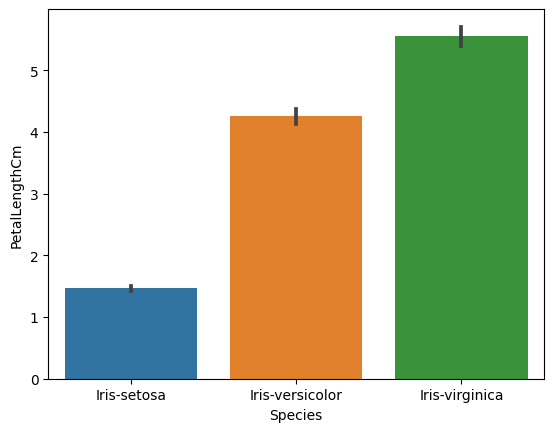

In [14]:
sb.barplot(x='Species' , y='PetalLengthCm' , data=data)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

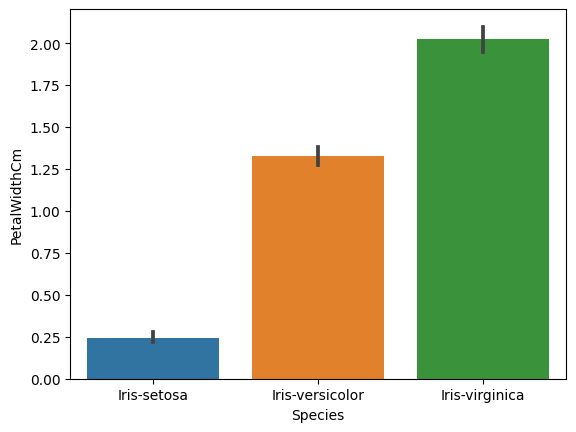

In [15]:
sb.barplot(x='Species' , y='PetalWidthCm' , data=data)

# **Boxplot**

<Axes: xlabel='SepalLengthCm'>

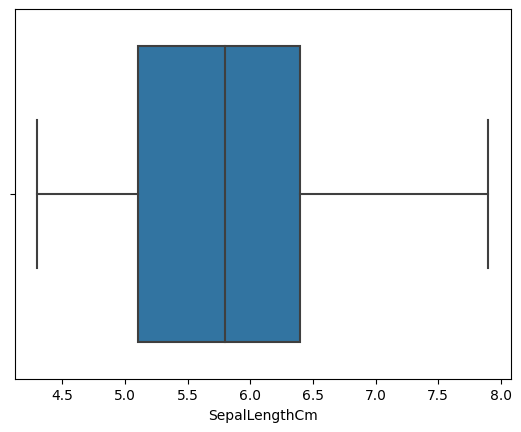

In [16]:
sb.boxplot(x = data['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm'>

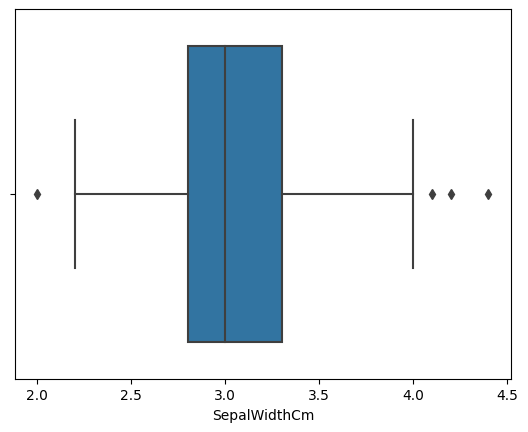

In [17]:
sb.boxplot(x = data['SepalWidthCm'])

<Axes: xlabel='SepalWidthCm'>

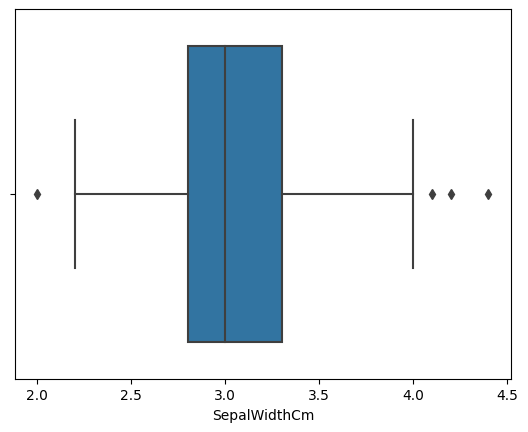

In [18]:
sb.boxplot(x = data['SepalWidthCm'])

<Axes: xlabel='PetalLengthCm'>

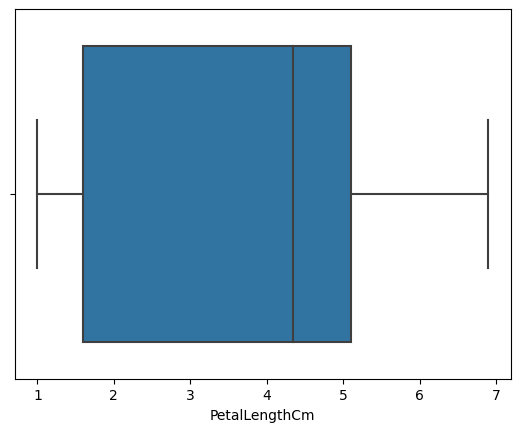

In [19]:
sb.boxplot(x = data['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm'>

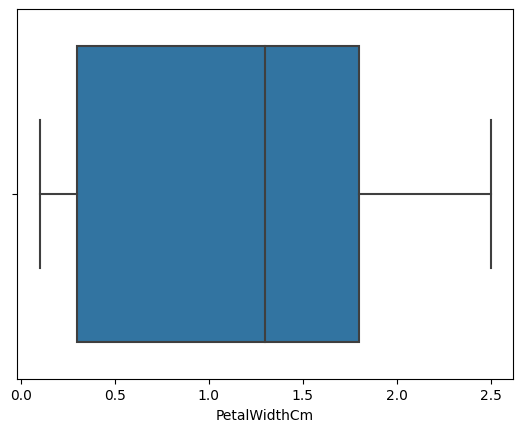

In [20]:
sb.boxplot(x = data['PetalWidthCm'])

# **Train and Test Data Split**

In [21]:
#Spliting features and labels

x=data.iloc[: ,1:-1 ]
y=data.iloc[: , -1]

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier()

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

score_rf = accuracy_score(rf_pred, y_test)
print("Random Forest:", score_rf)
print("Confusion Matrix:", confusion_matrix(y_test, rf_pred))

Random Forest: 1.0
Confusion Matrix: [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

score_dt = accuracy_score(dt_pred, y_test)
print("Decision Tree:", score_dt)
print("Confusion Matrix: ", confusion_matrix(y_test, dt_pred))

Decision Tree: 1.0
Confusion Matrix:  [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

score_lr = accuracy_score(lr_pred, y_test)
print("Decision Tree:", score_lr)
print("Confusion Matrix: ", confusion_matrix(y_test, lr_pred))

Decision Tree: 1.0
Confusion Matrix:  [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Testing**

In [26]:
print("Enter the values in cm: ")

sl = float(input("Enter Sepal Length : "))
sw = float(input("Enter Sepal Width : "))
pl = float(input("Enter Petal Length : "))
pw = float(input("Enter Petal Width: "))

Enter the values in cm: 
Enter Sepal Length : 2.2
Enter Sepal Width : 3.5
Enter Petal Length : 3.6
Enter Petal Width: 4.5


In [27]:
#PREDICTION

prediction = np.array([[sl,sw,pl,pw]])
print(lr.predict(prediction))

['Iris-virginica']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
